# 使用NMRNet进行快速准确的核磁化学位移预测

<div style="color:#2C3E50; background-color:#F7FAFC; border: 2px solid #E2E8F0; border-radius: 12px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); margin: 1.5rem 0;">
    <div style="background-color:#EDF2F7; padding: 1rem; border-top-left-radius: 10px; border-top-right-radius: 10px; border-bottom: 2px solid #E2E8F0">
        <h3 style="margin: 0; color:#2D3748; font-family: 'Inter', sans-serif;">📚 Notebook信息</h3>
    </div>
    <div style="padding: 1.5rem; line-height: 2;">
        <p style="margin: 0.5rem 0;">
            <span style="font-weight:600; color:#4A5568;">作者</span>: <span style="color:#718096;">徐凡杰</span>
        </p>
        <p style="margin: 0.5rem 0;">
            <span style="font-weight:600; color:#4A5568;">单位</span>: <span style="color:#718096;">人工智能应用电化学实验室 (AI4EC)</span>
        </p>
        <p style="margin: 0.5rem 0;">
            <span style="font-weight:600; color:#4A5568;">发布日期</span>: <span style="color:#718096;">2025-01-09</span>
        </p>
        <p style="margin: 0.5rem 0;">
            <span style="font-weight:600; color:#4A5568;">版权声明</span>: <span style="color:#718096;">©️ 2025 AI4EC All Rights Reserved</span>
        </p>
        <p style="margin: 0.5rem 0;">
            <span style="font-weight:600; color:#4A5568;">许可协议</span>: <span style="color:#718096;">采用<a href="http://creativecommons.org/licenses/by-nc-sa/4.0/" style="color:#4299E1; text-decoration:none; border-bottom: 1px dashed #4299E1;">CC BY-NC-SA 4.0</a>国际许可协议进行许可</span>
        </p>
        <div style="margin-top: 1.5rem; padding: 1rem; background-color:#EBF8FF; border-radius: 8px; border-left: 4px solid #4299E1;">
            <p style="margin:0; color:#2C5282; font-weight:500;">
                🚀 相关链接：
                <br/>
                论文 <a href="https://arxiv.org/abs/2408.15681" target="_blank" style="background-color:#4299E1; color:white; padding: 2px 8px; border-radius: 4px; font-size:0.9em; text-decoration:none;">https://arxiv.org/abs/2408.15681</a> 
                <br/>
                代码 <a href="https://github.com/Colin-Jay/NMRNet" target="_blank" style="background-color:#4299E1; color:white; padding: 2px 8px; border-radius: 4px; font-size:0.9em; text-decoration:none;">https://github.com/Colin-Jay/NMRNet</a>
                <br/>
                数据 <a href="https://zenodo.org/records/14279498" target="_blank" style="background-color:#4299E1; color:white; padding: 2px 8px; border-radius: 4px; font-size:0.9em; text-decoration:none;">https://zenodo.org/records/14279498</a>
            </p>
        </div>
    </div>
</div>

结构与光谱关系的研究对于光谱解析至关重要，影响结构解析和材料设计。然而，由于分子结构与光谱之间的关系极其复杂，从分子结构预测光谱一直是一个具有挑战性的问题。在本研究中，我们引入了NMRNet，一个基于SE(3) Transformer的深度学习框架，用于原子环境建模，并采用预训练与微调相结合的范式。为支持NMR化学位移预测模型的评估，我们建立了一个基于以往研究和数据库的综合基准测试，涵盖多样化的化学体系。将NMRNet应用于这些基准数据集时，我们在液态和固态NMR数据集上均达到了当前最先进的性能，展现了其在实际场景中的鲁棒性和实用性。这是首次将固态与液态NMR整合到统一的模型架构中，强调了针对不同原子环境进行领域特定处理的必要性。我们的工作为NMR预测设立了新标准，推动了深度学习在分析化学和结构化学中的应用。

<p style="color:#3f72af; font-weight:bold">这是论文"Towards a Unified Benchmark and Framework for Deep Learning-Based Prediction of Nuclear Magnetic Resonance Chemical Shifts"官方的demo notebook，预计需要20分钟完成阅读。</p>

<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/264f2fdd-0162-44ae-9793-70df179d5efd.jpeg" width="1400">
</div>

## 目录

* [背景](#background)
* [实践](#practice)
    * [1. 数据准备](#dataprepare)
    * [2. 预训练](#pre-training)
    * [3. 微调](#fine-tuning)
    * [4. 推理](#inference)
* [参考](#references)

## 背景 <a id ='background'></a>

谱学在阐明分子结构和动力学方面发挥着至关重要的作用。核磁共振（NMR）是一种在化学、生物学和材料科学中广泛使用的强大技术，可以揭示局部化学环境。准确预测NMR化学位移可以显著帮助谱信号的指认和NMR谱图的解释，进一步增强结构修正和构型确定。传统的NMR化学位移预测方法虽然有价值，但在平衡准确性和效率方面常常遇到限制，特别是在处理复杂的分子结构时。深度学习的最新进展为提高NMR化学位移预测提供了有希望的途径。

目前，化学位移预测的深度学习方法主要针对两个主题：液态和固态NMR。对于液态NMR，两个最大的公开数据库是nmrshiftdb2和QM9-NMR。在对nmrshiftdb2中分子的原子数量和元素类型施加限制后，Kuhn等人提取了剩余的分子及其对应的化学位移来创建衍生数据集（我们称之为nmrshiftdb2-2018）。他们使用图卷积网络（GCN），与传统的HOSE码方法相比取得了更好的结果。最近，基于E(3)等变消息传递神经网络（MPNN）的DetaNet在QM9-NMR数据集上相比之前使用FCHL的工作显示出显著改进。液态NMR机器学习模型通常忽略分子间和溶质-溶剂相互作用，仅关注单个分子。值得注意的是，Atwi等人在2022年的最新工作描述了一个自动化框架，通过纳入溶质-溶剂相互作用，成功预测了复杂液体溶液中的NMR化学位移。他们的方法使用分子动力学模拟来采样不同构型，并与从头算NMR计算相结合来确定液态NMR化学位移。然而，这种方法需要特殊的建模方法来考虑溶剂化相互作用。

对于固态NMR，由于缺乏组织良好的开放获取实验数据集，需要依赖计算数据集。虽然密度泛函理论（DFT）计算产生的误差很小，但其高计算成本突出了机器学习在准确性和效率方面的优势。与液态NMR不同，在固态NMR中提取每个原子的局部环境必须在周期性边界条件（PBC）下进行。2018年，Paruzzo等人从剑桥结构数据库（CSD）编译结构并使用DFT获得化学位移。他们使用原子位置平滑重叠（SOAP）描述符训练了ShiftML模型。2021年，Cheng等人提出了用于预测电池材料NMR的NN-NMR模型，并使用SOAP描述符，通过深度势能分子动力学模拟进行构型采样，并通过DFT计算。鉴于液态和固态NMR的不同特征，目前需要单独的框架来准确预测NMR化学位移。

<p style="color:#3f72af; font-weight:bold">然而，更理想的方法是开发一个统一的框架，能够有效处理来自两种状态的数据。</p>

<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/0136231c-46de-4cf5-8698-8eaa61449f6f.jpeg" width="1400">
</div>

 
<p style="color:#3f72af; font-weight:bold">这里对现有研究的数据集与模型方法的总结如下图:</p>

<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/458e1aed-d637-48a7-8404-5728f4dcbef5.jpeg" width="1400">
</div>

## 实践 <a id ='practice'></a>

考虑了液态核磁和固态核磁需要不同的局域环境描述方式后，我们将两种状态放入同一个处理框架中进行预测。


NMRNet包括四个模块: 

1. 在数据准备阶段，收集数据，并转化为模型输入

2. 在预训练阶段，利用纯结构数据学习如何更好的表示结构

3. 在微调阶段，利用核磁数据学习如何预测化学位移

4. 在推理阶段，将微调后的模型应用到不同场景下，快速准确预测化学位移


现在，首先需要做的事情是从GitHub上面将本项目的代码clone到本地。

```
git clone https://github.com/Colin-Jay/NMRNet.git
```
或者
```
git clone git@github.com:Colin-Jay/NMRNet.git
```


In [1]:
!git clone https://github.com/Colin-Jay/NMRNet.git

Cloning into 'NMRNet'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (328/328), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 328 (delta 128), reused 302 (delta 104), pack-reused 0 (from 0)
Receiving objects: 100% (328/328), 15.63 MiB | 5.41 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [2]:
!cp /bohr/nmrnet-data-8bz5/v1/checkpoint_best.pt NMRNet/demo/notebook/weight/checkpoint_best.pt

In [3]:
import os
workdir = './NMRNet/'
os.chdir(workdir)

In [4]:
!ls

LICENSE  README.md  data  demo	figure	script	uninmr	weight


### 数据准备 <a id ='dataprepare'></a>
<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/efc76a1f-6a7b-4a8e-b300-0bebf69a5f1e.jpeg" width="1400">
</div>



### 预训练 <a id ='pre-training'></a>

对于液态 NMR 预测，我们直接使用了先前Uni-Mol工作中在大规模分子数据集上自监督预训练得到的权重。

为了让 NMRNet 充分学习到晶体局部结构的表示，我们收集了超过 480 万个晶体三维结构，并提取了每个原子的局部环境进行自监督预训练。经过预训练后，NMRNet 从大量结构中学习到更好的特征表示，这显著提升了在高质量NMR数据有限的情况下的性能。

<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/41809195-c18a-41e3-85ed-76b5aa6ae703.jpeg" width="1400">
</div>


准备好预训练的数据集后，直接运行以下代码即可进行预训练。

```
sh script/pretrain_rcut.sh
```

### 微调 <a id ='fine-tuning'></a>

微调阶段需要根据场景选择加载不同的预训练模型。对于液态 NMR 预测，直接使用先前Uni-Mol工作中在大规模分子数据集上自监督预训练得到的权重。而对于固态 NMR 预测，使用NMRNet在大规模晶体数据集上得到的预训练权重。

本工作中收集的数据集:

<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/a1fa6935-ba79-4d7b-8910-8d4bbf2b3fd0.jpeg" width="1400">
</div>


准备好微调的数据集后，直接运行以下代码即可进行微调。

```
sh script/pretrain_rcut.sh
```

在nmrshiftdb2-2024上的性能: 

<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/43d7f1ba-2793-47e6-af92-576b7335c534.jpeg" width="1400">
</div>


在各个开源数据集上的预测结果: 

<div align="center">
    <img src="https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/15155/25643a08da9a4706a06d28bd40c6eb21/6b3ac905-7880-473d-982f-4db4179fd202.jpeg" width="1400">
</div>


### 推理 <a id ='inference'></a>

推理阶段，目前我们提供了三种输入方式: 

1. smiles

2. mol文件(或者画出分子结构)

3. xyz文件

<p style="color:#3f72af; font-weight:bold">无论哪种方式，最终都会转化为atoms序列和coordinates矩阵。</p>

这里用xyz方式进行示例，example结构来源自"Chemical shifts in molecular solids by machine learning." (Nat Commun 9, 4501 (2018))。


In [5]:
from ase import Atoms
import numpy as np
from itertools import product
from scipy.spatial import distance_matrix

# 读取xyz文件得到晶胞

def parse_shiftml1(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # 分割字符串，提取每行
    startindex = []
    for index, line in enumerate(lines):
        if line.startswith('Lattice='):
            startindex.append((index-1))

    atoms_list = []
    atoms_target = []
    atoms_target_mask = []

    for i in range(len(startindex)):

        lattice_params = lines[startindex[i]+1].split('Lattice="')[1].split('"')[0].split()
        lattice_params = [float(x) for x in lattice_params]
        lattice_matrix = np.array(lattice_params).reshape((3, 3))


        # 创建Atoms对象
        atoms = Atoms()

        symbols = []
        positions = []
        targets = []
        targets_mask = []

        # 解析原子位置
        if i == len(startindex)-1:
            next_index = len(lines)
        else:
            next_index = startindex[i+1]
        for line in lines[startindex[i]+2:next_index]:
            parts = line.split()
            symbol = parts[0] 
            position = [float(x) for x in parts[1:4]]

            symbols.append(symbol)
            positions.append(position)

        atoms = Atoms(symbols=symbols, positions=positions, cell=lattice_matrix, pbc=True)

        atoms_list.append(atoms)
    return atoms_list

# 对单个晶胞进行处理得到各个原子的局域结构

def single_rcut(atoms, rcut=6):
    rcut_atoms = []
    rcut_coords = []
    rcut_targets = []
    rcut_masks = []

    atom = atoms.get_chemical_symbols()
    pbc_atoms = atom*125  

    pos = atoms.get_positions()
    pbc_pos = np.tile(pos, (125, 1, 1))                   # (343,n,3)
    lattice_matrix = (atoms.cell)
    ks = [0, 1, -1, 2, -2]
    pbc_matrix = np.array(list(product(ks, repeat=3)))
    pbc_pos += np.dot(pbc_matrix, lattice_matrix).reshape(125,-1,3)
    pbc_pos = pbc_pos.reshape(-1,3)                      # (343*n,3)
    dist_pbc = distance_matrix(pbc_pos, pos, 2).astype(np.float32)       # (125*n,n)

    for index, element in enumerate(atom):
        dist_mask = (dist_pbc.reshape(-1,pos.shape[0])[:,index]<rcut)
        rcut_atoms.append(np.array(pbc_atoms)[dist_mask].tolist())
        rcut_coords.append(pbc_pos[dist_mask])
        rcut_target = [0]*len(atoms)*125  
        # rcut_target[index] = targets[index]
        rcut_targets.append(np.array(rcut_target)[dist_mask])
        rcut_mask = [0]*len(atoms)*125
        rcut_mask[index] = 1
        rcut_masks.append(np.array(rcut_mask)[dist_mask])
                
    return rcut_atoms, rcut_coords, rcut_targets, rcut_masks

# 预测结果的相关评价指标

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

def reg_metrics(target, predict):
    r2 = r2_score(target, predict)
    mae = mean_absolute_error(target, predict)
    mse = mean_squared_error(target, predict)
    rmse = math.sqrt(mse)
    return r2, mae, mse, rmse

In [6]:
# 得到晶胞

atoms_list = parse_shiftml1('./demo/notebook/xyz/3_DIAZOLE.xyz')


In [7]:
# 得到各个原子的局域结构

rcut_atoms, rcut_coords, rcut_targets, rcut_masks = single_rcut(atoms_list[0])


In [8]:
# 转化为模型的输入

rcut_list = []
for i in range(len(rcut_atoms)):
    ret = {}
    ret['atoms'] = rcut_atoms[i]
    ret['coordinates'] = rcut_coords[i]
    ret['atoms_target'] = rcut_targets[i]
    ret['atoms_target_mask'] = rcut_masks[i]
    rcut_list.append(ret)

In [9]:
# 定义相关参数

import argparse
from unicore.data import Dictionary
from uninmr.utils import parse_select_atom, TargetScaler

def get_args():
    args = argparse.Namespace()
    # model
    args.encoder_layers = 8
    args.encoder_embed_dim = 512
    args.encoder_ffn_embed_dim = 2048
    args.encoder_attention_heads = 64
    args.dropout = 0.1
    args.emb_dropout = 0.1
    args.attention_dropout = 0.1
    args.activation_dropout = 0.0
    args.pooler_dropout = 0.0
    args.max_seq_len = 1024
    args.activation_fn = "gelu"
    args.pooler_activation_fn = "tanh"
    args.post_ln = False
    args.masked_token_loss = -1.0
    args.masked_coord_loss = -1.0
    args.masked_dist_loss = -1.0
    args.x_norm_loss = -1.0
    args.delta_pair_repr_norm_loss = -1.0
    args.lattice_loss = -1.0
    args.encoder_layers = 15
    # task
    args.selected_atom = 'H'

    args.num_classes=1 
    args.atom_descriptor=0
    args.classification_head_name='nmr_head'
    args.model_path='./demo/notebook/weight/checkpoint_best.pt'
    args.dict_path='./demo/notebook/dict/oc_limit_dict.txt'
    args.global_distance=0
    args.gaussian_kernel = True
    args.saved_dir='./demo/notebook/scaler'
    args.max_atoms=512
    args.max_seq_len=1024
    args.seed=1
    args.batch_size=16
    args.required_batch_size_multiple=1
    args.num_workers=8
    args.data_buffer_size=10
    args.log_format='simple'
    args.log_interval=50
    return args

args = get_args()
dictionary = Dictionary.load(args.dict_path)
mask_idx = dictionary.add_symbol("[MASK]", is_special=True)
selected_token = parse_select_atom(dictionary, args.selected_atom)
target_scaler=TargetScaler(args.saved_dir)

fused_multi_tensor is not installed corrected
fused_rounding is not installed corrected
fused_layer_norm is not installed corrected
fused_softmax is not installed corrected
/opt/mamba/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
# 加载模型

import logging
import os
import sys
import pickle
import torch
from unicore import checkpoint_utils, distributed_utils, options, utils
from unicore.logging import progress_bar
from unicore import tasks
from uninmr.models import UniMatModel

logging.basicConfig(
    format="%(asctime)s | %(levelname)s | %(name)s | %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    level=os.environ.get("LOGLEVEL", "INFO").upper(),
    stream=sys.stdout,
)
logger = logging.getLogger("unimat.inference")


# use_cuda = torch.cuda.is_available()
use_cuda = False
device_id=0
if use_cuda:
    torch.cuda.set_device(device_id)


# Load model
state = checkpoint_utils.load_checkpoint_to_cpu(args.model_path)
state['model'] = {
    (key.replace('classification_heads', 'node_classification_heads') 
     if key.startswith('classification_heads') else key): value
    for key, value in state['model'].items()
}
model = UniMatModel(args, dictionary)
model.register_node_classification_head(
    args.classification_head_name,
    num_classes=args.num_classes,
    extra_dim=args.atom_descriptor,
)
logger.info("loading model(s) from {}".format(args.model_path))
model.load_state_dict(state["model"], strict=False)

# Move models to GPU
model.half()
if use_cuda:
    model.cuda()
else:
    model.float()


2025-02-14 21:32:50 | INFO | unimat.inference | loading model(s) from ./demo/notebook/weight/checkpoint_best.pt


In [11]:
# 加载数据集

from unicore.data import (
    Dictionary,
    NestedDictionaryDataset,
    AppendTokenDataset,
    PrependTokenDataset,
    RightPadDataset,
    EpochShuffleDataset,
    TokenizeDataset,
    RightPadDataset2D,
    LMDBDataset,
    RawLabelDataset,
)
from uninmr.data import (
    KeyDataset,
    ConformerSampleDataset,
    TTADataset,
    IndexDataset,
    TTAIndexDataset,
    ToTorchDataset,
    MaskPointsDataset,
    DistanceDataset,
    GlobalDistanceDataset,
    EdgeTypeDataset,
    RightPadDataset3D,
    PrependAndAppend2DDataset,
    PrependAndAppend3DDataset,
    RightPadDataset2D0,
    LatticeNormalizeDataset,
    LatticeMatrixNormalizeDataset,
    RemoveHydrogenDataset,
    CroppingDataset,
    NormalizeDataset,
    TargetScalerDataset,
    FoldLMDBDataset,
    StackedLMDBDataset,
    SplitLMDBDataset,
    SelectTokenDataset,
    FilterDataset,
)

import torch
from torch.utils.data import Dataset

class ListDataset(Dataset):
    def __init__(self, data_list):
        self.data_list = data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        return self.data_list[idx]


dataset = ListDataset(rcut_list)
matid_dataset = IndexDataset(dataset)

dataset = CroppingDataset(dataset, args.seed, "atoms", "coordinates", args.max_atoms)
dataset = NormalizeDataset(dataset, "coordinates")

# lattice_dataset = LatticeNormalizeDataset(dataset, 'abc', 'angles')
# lattice_dataset = ToTorchDataset(lattice_dataset, 'float32')

token_dataset = KeyDataset(dataset, "atoms")
token_dataset = TokenizeDataset(token_dataset, dictionary, max_seq_len=args.max_seq_len)
atoms_target_mask_dataset = KeyDataset(dataset, "atoms_target_mask")
select_atom_dataset = SelectTokenDataset(token_dataset=token_dataset, token_mask_dataset=atoms_target_mask_dataset, selected_token=selected_token)
filter_list = [0 if torch.all(select_atom_dataset[i]==0) else 1 for i in range(len(select_atom_dataset))]

dataset = FilterDataset(dataset, filter_list)
matid_dataset = FilterDataset(matid_dataset, filter_list)
token_dataset = FilterDataset(token_dataset, filter_list)
select_atom_dataset = FilterDataset(select_atom_dataset, filter_list)

coord_dataset = KeyDataset(dataset, "coordinates")

def PrependAndAppend(dataset, pre_token, app_token):
    dataset = PrependTokenDataset(dataset, pre_token)
    return AppendTokenDataset(dataset, app_token)

token_dataset = PrependAndAppend(token_dataset, dictionary.bos(), dictionary.eos())
select_atom_dataset = PrependAndAppend(select_atom_dataset, dictionary.pad(), dictionary.pad())

coord_dataset = ToTorchDataset(coord_dataset, 'float32')

if args.global_distance:
    lattice_matrix_dataset = LatticeMatrixNormalizeDataset(dataset, 'lattice_matrix')
    logger.info("use global distance: {}".format(args.global_distance))
    distance_dataset = GlobalDistanceDataset(coord_dataset, lattice_matrix_dataset)
    distance_dataset = PrependAndAppend3DDataset(distance_dataset, 0.0)
    distance_dataset = RightPadDataset3D(distance_dataset, pad_idx=0)
else:
    distance_dataset = DistanceDataset(coord_dataset)
    distance_dataset = PrependAndAppend2DDataset(distance_dataset, 0.0)
    distance_dataset = RightPadDataset2D(distance_dataset, pad_idx=0)
coord_dataset = PrependAndAppend(coord_dataset, 0.0, 0.0)
edge_type = EdgeTypeDataset(token_dataset, len(dictionary))

tgt_dataset = KeyDataset(dataset, "atoms_target")
tgt_dataset = TargetScalerDataset(tgt_dataset, target_scaler, args.num_classes)
tgt_dataset = ToTorchDataset(tgt_dataset, dtype='float32')

tgt_dataset = PrependAndAppend(tgt_dataset, dictionary.pad(), dictionary.pad())

nest_dataset = NestedDictionaryDataset(
        {
            "net_input": {
                "select_atom": RightPadDataset(
                    select_atom_dataset,
                    pad_idx=dictionary.pad(),
                ),
                "src_tokens": RightPadDataset(
                    token_dataset,
                    pad_idx=dictionary.pad(),
                ),
                "src_coord": RightPadDataset2D0(
                    coord_dataset,
                    pad_idx=0,
                ),
                "src_distance": distance_dataset,
                "src_edge_type": RightPadDataset2D(
                    edge_type,
                    pad_idx=0,
                ),
            },
            "target": {
                "finetune_target": RightPadDataset(
                    tgt_dataset,
                    pad_idx=0,
                ),
            },
            "matid": matid_dataset,
        },
    )

In [12]:
# 开始预测化学位移

from torch.utils.data import DataLoader

dataloader = DataLoader(nest_dataset, batch_size=1, shuffle=False)  

model.eval()
with torch.no_grad():
    all_predicts = []
    for batch in dataloader:
        net_output = model(**{k.replace('net_input.', ''): v for k, v in batch.items() if k.startswith('net_input.')},
                           features_only=True, 
                           classification_head_name=args.classification_head_name)
        predict = target_scaler.inverse_transform(
            net_output[0].view(-1, args.num_classes).data.cpu()
        ).astype('float32')
        all_predicts.append(predict)
    
    final_predicts = np.concatenate(all_predicts)

In [13]:
# 整理预测的化学位移列表

d=final_predicts.reshape(-1).reshape(-1,4).mean(axis=1)
print(d.shape)


(16,)


In [14]:
# 计算预测值与实验值的相关指标

e3=np.array([4.80, 0.70, 1.40, 13.00, 1.40, 1.50, 15.00, 5.20])

s3=29.91-d*0.987
s3 = np.concatenate([s3[:1], [s3[1:4].mean()], [s3[4:7].mean()], s3[7:8], [s3[8:11].mean()],  [s3[11:14].mean()], s3[14:15], s3[15:]])
r2_pred, mae_pred, mse_pred, rmse_pred = reg_metrics(e3,s3)

g3 = np.array([25.93, 25.93, 25.93, 25.93, 29.37, 29.37, 29.37, 29.37, 29.39, 29.39, 29.39, 29.39, 29.83, 29.83, 29.83, 29.83, 29.09, 29.09, 29.09, 29.09, 29.99, 29.99, 29.99, 29.99, 29.36, 29.36, 29.36, 29.36, 15.88, 15.88, 15.88, 15.88, 29.37, 29.37, 29.37, 29.37, 28.86, 28.86, 28.86, 28.86, 28.39, 28.39, 28.39, 28.39, 29.01, 29.01, 29.01, 29.01, 28.52, 28.52, 28.52, 28.52, 29.0, 29.0, 29.0, 29.0, 14.68, 14.68, 14.68, 14.68, 24.71, 24.71, 24.71, 24.71])
g3 = g3.reshape(-1,4).mean(axis=1)
g3=29.91-g3*0.987
g3 = np.concatenate([g3[:1], [g3[1:4].mean()], [g3[4:7].mean()], g3[7:8], [g3[8:11].mean()],  [g3[11:14].mean()], g3[14:15], g3[15:]])
r2_cal, mae_cal, mse_cal, rmse_cal = reg_metrics(e3,g3)


2025-02-14 21:33:02 | INFO | matplotlib.font_manager | generated new fontManager


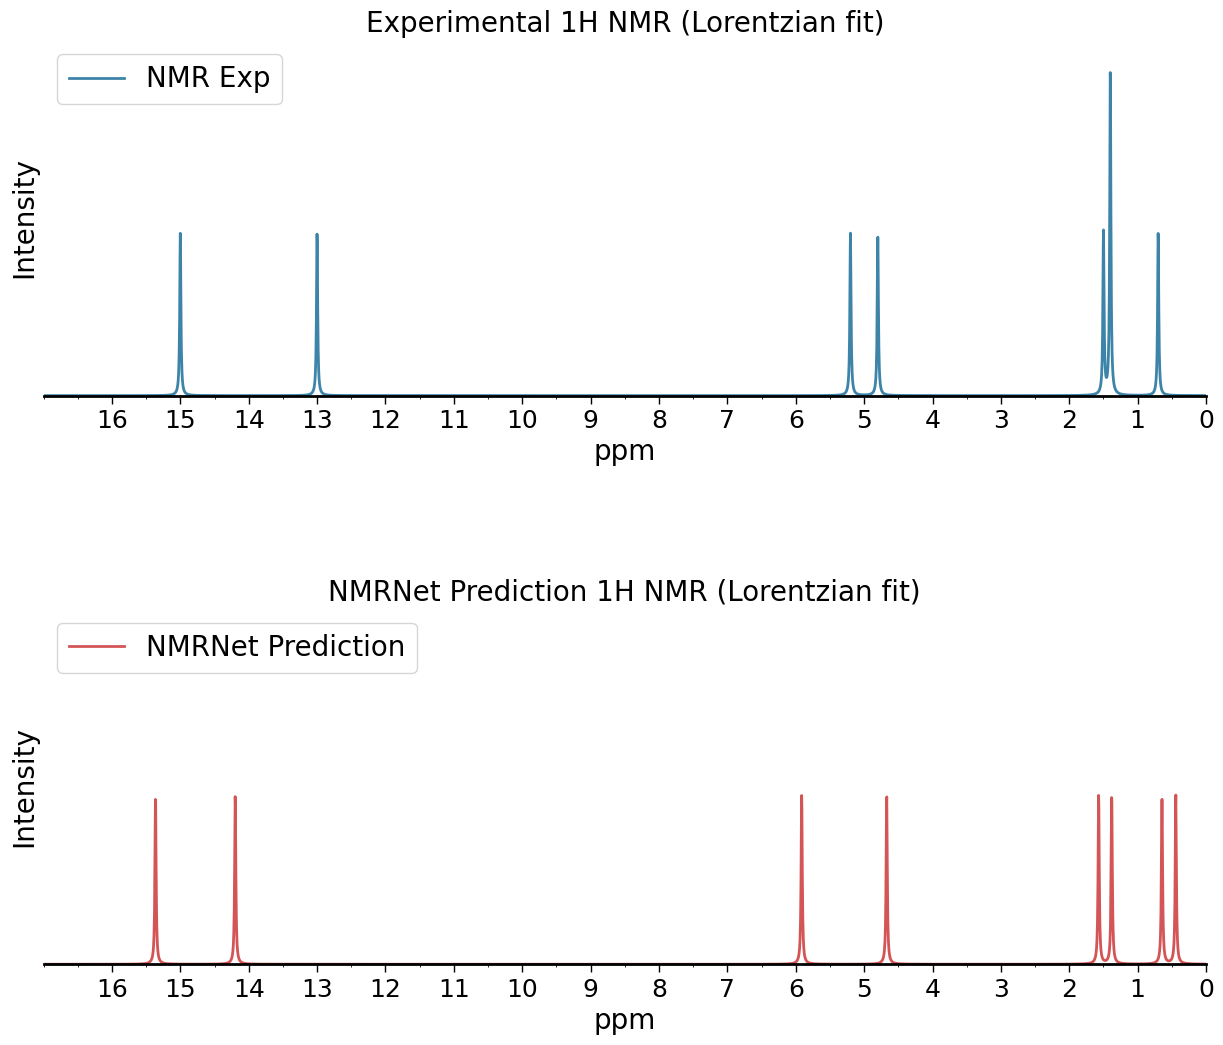

In [15]:
# 实验与预测的NMR谱图对比

import numpy as np
import matplotlib.pyplot as plt

# 使用Lorentzian函数替代高斯分布
def lorentzian(x, H, gamma=0.01):
    return 1 / (1 + ((x - H) / gamma) ** 2)

# 创建x轴的值
x_max = int(max(max(e3), max(s3))) + 2
x = np.linspace(0, x_max, 5000)

# 根据实验数据计算对应的Lorentzian峰
all_peak_exp = np.sum(lorentzian(x[:, None], e3), axis=1)

# 对预测数据绘制相同的Lorentzian峰
all_peak_pred = np.sum(lorentzian(x[:, None], s3), axis=1)

# 归一化
max_exp = np.max(all_peak_exp)
max_pred = np.max(all_peak_pred)
all_peak_exp /= max_exp
all_peak_pred /= max_pred

# 绘制2行1列的图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 绘制实验数据的Lorentzian峰
ax1.plot(x, all_peak_exp, linewidth=2, color='#3d84a8', label='NMR Exp')
ax1.set_xlabel('ppm', fontsize=20)
ax1.set_ylabel('Intensity', fontsize=20)
ax1.set_title('Experimental 1H NMR (Lorentzian fit)', fontsize=20)
ax1.set_xlim(x_max, 0)
ax1.set_ylim(0, 1.1)
ax1.set_xticks(np.arange(0, x_max, 1))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
# ax1.tick_params(axis='x', which='minor', direction='out', length=4, width=0.5)
ax1.tick_params(axis='x', which='major', direction='out', length=6, width=1, labelsize=18)
ax1.set_yticks([])  # 隐藏y轴刻度线
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.legend(fontsize=20, loc='upper left')

# 绘制NMRNet预测数据的Lorentzian峰
ax2.plot(x, all_peak_pred, linewidth=2, color='#d45556', label='NMRNet Prediction')
ax2.set_xlabel('ppm', fontsize=20)
ax2.set_ylabel('Intensity', fontsize=20)
ax2.set_title('NMRNet Prediction 1H NMR (Lorentzian fit)', fontsize=20)
ax2.set_xlim(x_max, 0)
ax2.set_ylim(0, 2.1)
ax2.set_xticks(np.arange(0, x_max, 1))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
# ax2.tick_params(axis='x', which='minor', direction='out', length=4, width=0.5)
ax2.tick_params(axis='x', which='major', direction='out', length=6, width=1, labelsize=18)
ax2.set_yticks([])  # 隐藏y轴刻度线
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_linewidth(2)
ax2.legend(fontsize=20, loc='upper left')
# 显示图形
# plt.tight_layout()  # 自动调整子图之间的间距
plt.subplots_adjust(hspace=0.6)
plt.show()


In [16]:
# 实验、计算、预测结果

import pandas as pd

df = pd.DataFrame({
    'Exp': np.round(e3, 2),
    'Cal': np.round(g3, 2),
    'Pred': np.round(s3, 2)
})

# Print the table
print("Experimental, Calculated, and Predicted NMR Results:")
print(df)

Experimental, Calculated, and Predicted NMR Results:
    Exp    Cal   Pred
0   4.8   4.32   4.67
1   0.7   0.76   0.64
2   1.4   0.81   0.44
3  13.0  14.24  14.20
4   1.4   1.41   1.38
5   1.5   1.44   1.57
6  15.0  15.42  15.36
7   5.2   5.52   5.91


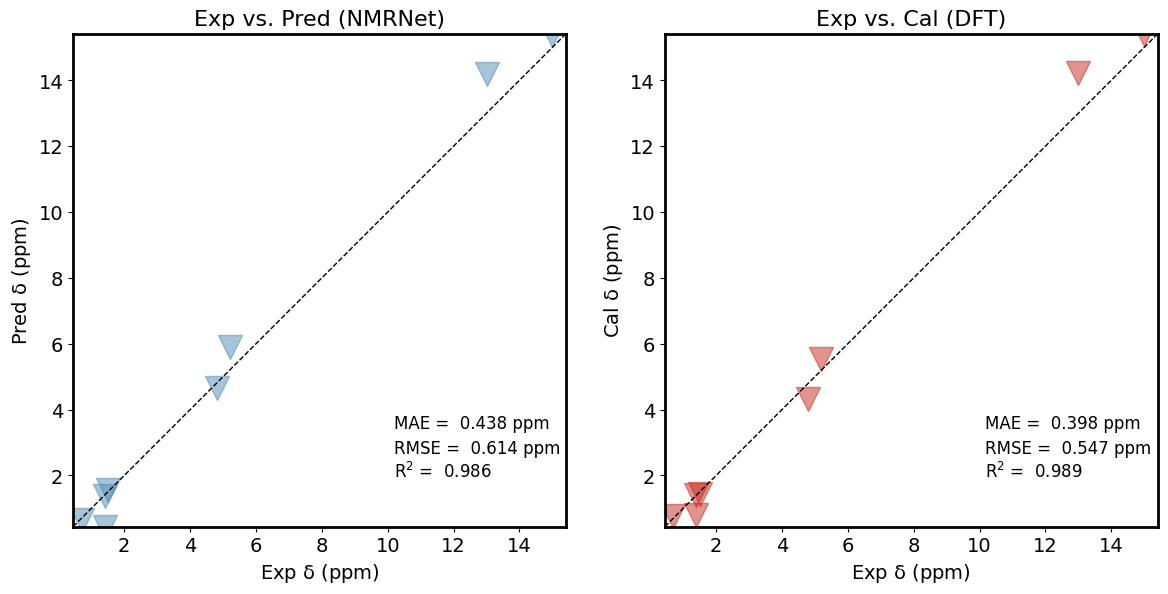

In [17]:
# 计算、预测结果与实验的相关性图

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create subplots: one for Exp vs. Pred (NMRNet) and one for Exp vs. Cal (DFT)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot Exp vs. Pred (NMRNet)
axes[0].scatter(e3, s3, alpha=0.5, color='#508AB2', s=300, marker='v', label='NMRNet Prediction')
axes[0].set_title("Exp vs. Pred (NMRNet)", fontsize=16)
axes[0].set_xlabel("Exp $\\mathrm{\\delta}$ (ppm)", fontsize=14)
axes[0].set_ylabel("Pred $\\mathrm{\\delta}$ (ppm)", fontsize=14)
axes[0].text(0.65, 0.20, f"MAE ={mae_pred:>7.3f} ppm", transform=axes[0].transAxes, fontsize=12)
axes[0].text(0.65, 0.15, f"RMSE ={rmse_pred:>7.3f} ppm", transform=axes[0].transAxes, fontsize=12)
axes[0].text(0.65, 0.10, f"R$^2$ ={r2_pred:>7.3f}", transform=axes[0].transAxes, fontsize=12)

# Plot Exp vs. Cal (DFT)
axes[1].scatter(e3, g3, alpha=0.5, color='#C52A20', s=300, marker='v', label='DFT Calculation')
axes[1].set_title("Exp vs. Cal (DFT)", fontsize=16)
axes[1].set_xlabel("Exp $\\mathrm{\\delta}$ (ppm)", fontsize=14)
axes[1].set_ylabel("Cal $\\mathrm{\\delta}$ (ppm)", fontsize=14)
axes[1].text(0.65, 0.20, f"MAE ={mae_cal:>7.3f} ppm", transform=axes[1].transAxes, fontsize=12)
axes[1].text(0.65, 0.15, f"RMSE ={rmse_cal:>7.3f} ppm", transform=axes[1].transAxes, fontsize=12)
axes[1].text(0.65, 0.10, f"R$^2$ ={r2_cal:>7.3f}", transform=axes[1].transAxes, fontsize=12)

# Adjust axis ranges so they are the same for both plots
x_min, x_max = min(e3.min(), s3.min(), g3.min()), max(e3.max(), s3.max(), g3.max())
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(x_min, x_max)

# Add identity line (45-degree line)
axes[0].plot([x_min, x_max], [x_min, x_max], 'k--', lw=1)
axes[1].plot([x_min, x_max], [x_min, x_max], 'k--', lw=1)

# Set aspect ratio to be equal
axes[0].set_aspect('equal', adjustable='box')
axes[1].set_aspect('equal', adjustable='box')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Set border styling
for ax in axes.flat:
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Show plot
plt.show()



## 参考 <a id ='references'></a>

1. Xu F, Guo W, Wang F, et al. Towards a Unified Benchmark and Framework for Deep Learning-Based Prediction of Nuclear Magnetic Resonance Chemical Shifts[J]. arXiv preprint arXiv:2408.15681, 2024.

2. Zhou G, Gao Z, Ding Q, et al. Uni-mol: A universal 3d molecular representation learning framework[J]. 2023.

3. Kuhn S, Schlörer N E, Kolshorn H, et al. From chemical shift data through prediction to assignment and NMR LIMS-multiple functionalities of nmrshiftdb2[J]. Journal of Cheminformatics, 2012, 4(Suppl 1): P52.

4. Kuhn S, Schlörer N E. Facilitating quality control for spectra assignments of small organic molecules: nmrshiftdb2–a free in‐house NMR database with integrated LIMS for academic service laboratories[J]. Magnetic Resonance in Chemistry, 2015, 53(8): 582-589.

5. Gupta A, Chakraborty S, Ramakrishnan R. Revving up 13C NMR shielding predictions across chemical space: benchmarks for atoms-in-molecules kernel machine learning with new data for 134 kilo molecules[J]. Machine Learning: Science and Technology, 2021, 2(3): 035010.

6. Jonas E, Kuhn S. Rapid prediction of NMR spectral properties with quantified uncertainty[J]. Journal of cheminformatics, 2019, 11: 1-7.

7. Zou Z, Zhang Y, Liang L, et al. A deep learning model for predicting selected organic molecular spectra[J]. Nature Computational Science, 2023, 3(11): 957-964.

8. Paruzzo F M, Hofstetter A, Musil F, et al. Chemical shifts in molecular solids by machine learning[J]. Nature communications, 2018, 9(1): 4501.

9. Lin M, Xiong J, Su M, et al. A machine learning protocol for revealing ion transport mechanisms from dynamic NMR shifts in paramagnetic battery materials[J]. Chemical Science, 2022, 13(26): 7863-7872.

10. Groom C R, Bruno I J, Lightfoot M P, et al. The Cambridge structural database[J]. Structural Science, 2016, 72(2): 171-179.

11. https://bohrium.dp.tech/notebooks/3313403083

12. https://ai4ec.ac.cn/apps/nmrnet

13. https://bohrium.dp.tech/apps/nmrnet001

14.  https://ai4ec.ac.cn/apps/nmrnet